# Hoja de trabajo 2
### Diego Franco 20240

## Ejercicio 1 - Preguntas Teóricas

## 1.1

### ¿Cómo definiría “Programación Lineal”?
Es un método matemático y técnica de optimización utilizada para resolver problemas en los que se busca maximizar o minimizar una función lineal sujeta a un conjunto de restricciones también lineales.

### ¿Cuáles son los escenarios típicos y los problemas del mundo real que se pueden modelar mediante la programación lineal?
Entre los escenarios típicos se encuentran:
- La maximización de beneficios o minimización de costes en una empresa.
- La minimización de pérdidas en una empresa.
- La minimización de costes en una empresa.
- Asignación de recursos escasos.
- Optimización de rutas y transporte.

Entre otros.


### ¿Cómo contribuye la programación lineal a la toma de decisiones en diversas industrias, como la fabricación, el transporte, las finanzas y la asignación de recursos?

La programación lineal contribuye a la toma de decisiones con un enfoque cuantitativo y un enfoque de eficiencia. Con un enfoque cuantitativo, la programación lineal ayuda a los gerentes a tomar decisiones basadas en datos y hechos. Con un enfoque de eficiencia, la programación lineal ayuda a los gerentes a tomar decisiones que maximicen los beneficios o minimicen los costos.




## 1.2 

### ¿Cómo definiría los componentes clave de un problema de programación lineal: función objetivo, variables de decisión y restricciones?
- Funcion Objetivo:
Es una expresión matemática lineal que representa el objetivo que se busca maximizar o minimizar en el problema.

- Variables de decisión:
Son las incógnitas que representan las cantidades que el problema busca determinar.

- Restricciones:
Son condiciones que limitan las opciones disponibles para las variables de decisión.


### ¿Cómo se formula matemáticamente un problema de programación lineal?

Para formular un problema de programación lineal, se debe seguir los siguientes pasos:
- Definir las variables de decisión: Identifica las cantidades que deseas determinar en el problema y asigna una variable a cada una de ellas.

- Escribir la función objetivo: Establece el objetivo que deseas maximizar o minimizar.

- Escribir las restricciones: Define las restricciones que limitan las opciones disponibles para las variables de decisión.

- Establecer las limitaciones de las variables de decisión: Especifica cualquier restricción adicional sobre las variables de decisión, como limitaciones mínimas o máximas. 

Y ya se deberia de juntar todo en una sola ecuación.


### ¿Cuál es la interpretación geométrica de un problema de programación lineal en dos dimensiones?
La interpretación geométrica se realiza trazando las rectas que representan las restricciones y la función objetivo en el plano cartesiano. Cada restricción define una región factible en el plano en la que las soluciones son posibles y cumplen con las restricciones. 

La región donde todas las restricciones se superponen es la región factible que contiene las soluciones óptimas. Esto se llama "conjunto factible".


### ¿Cómo se relacionan las regiones factibles, las soluciones óptimas y los puntos de esquina en la programación lineal?
Las soluciones óptimas son los puntos de esquina de la región factible. Esto significa que la solución óptima se encuentra en uno de los vértices de la región factible.
Además de ello podemos encontrar realcion en los siguientes puntos:
La región factible es el conjunto de todas las combinaciones posibles de las variables de decisión que cumplen con todas las restricciones del problema.
Los puntos de esquina, también conocidos como vértices o soluciones básicas factibles, son los puntos de intersección de las restricciones que definen la región factible.
Las soluciones óptimas son aquellas que maximizan o minimizan la función objetivo dentro de la región factible



### ¿Qué es el método gráfico y cuándo es adecuado para resolver problemas de programación lineal?
El método gráfico es un método de solución de problemas de programación lineal que utiliza una representación visual de la región factible para determinar la solución óptima. Este método es adecuado para problemas de programación lineal que tienen dos variables de decisión y que pueden representarse en un plano cartesiano.


## Ejercicio 2 - Preguntas Prácticas

### 2.1 Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad

- Horas de mano de obra: 2x + 4y ≤ 100
- Unidades de materia prima: 3x + 2y ≤ 120
- Restricción de no-negatividad: x ≥ 0, y ≥ 0

### 2.2 Usando programación lineal, determine cuántas unidades de cada producto se deben producir para maximizar la ganancia y cumplir con las restricciones de recursos.

In [8]:
from pulp import LpMaximize, LpProblem, LpVariable

# Crear el problema
model = LpProblem(name="maximize_profit", sense=LpMaximize)

# Definir las variables de decisión
x = LpVariable(name="x", lowBound=0, cat="Integer")
y = LpVariable(name="y", lowBound=0, cat="Integer")

# Definir la función objetivo
model += 10 * x + 15 * y, "Profit"

# Agregar las restricciones
model += 2 * x + 4 * y <= 100, "Labor_constraint"
model += 3 * x + 2 * y <= 120, "Material_constraint"

# Restricción de no-negatividad
model += x >= 0, "Nonnegativity_x"
model += y >= 0, "Nonnegativity_y"

# Resolver el problema
model.solve()

# Imprimir los resultados
print(f"Unidades de Producto A a producir: {x.value()}")
print(f"Unidades de Producto B a producir: {y.value()}")
print(f"Ganancia Máxima: ${model.objective.value()}")


Unidades de Producto A a producir: 34.0
Unidades de Producto B a producir: 8.0
Ganancia Máxima: $460.0


### 2.3 Interpretacion

- Unidades de Producto A a producir: 34.0
Esto significa que para maximizar la ganancia, la fábrica debe producir 34 unidades del Producto A.

- Unidades de Producto B a producir: 8.0
Para lograr la máxima ganancia, la fábrica debe producir 8 unidades del Producto B.

- Ganancia Máxima: $460.0
La ganancia máxima que la fábrica puede obtener al producir 34 unidades del Producto A y 8 unidades del Producto B es de $460.0.

### 2.4 Muestre una gráfica del feasible area mostrando el punto donde está su respuesta

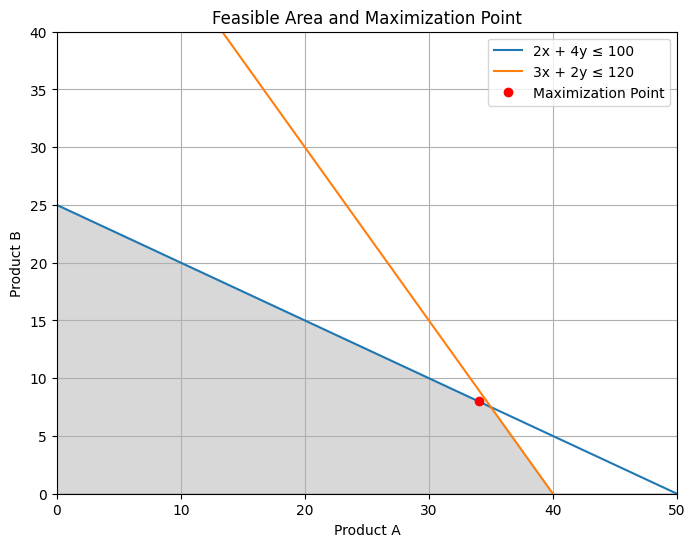

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pulp import LpMaximize, LpProblem, LpVariable, value

# Funciones de las restricciones
labor_constraint = lambda x: (100 - 2*x) / 4
material_constraint = lambda x: (120 - 3*x) / 2

# Rango de valores para x
x_values = np.linspace(0, 60, 100)

# Valores de las restricciones
labor_values = labor_constraint(x_values)
material_values = material_constraint(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_values, labor_values, label="2x + 4y ≤ 100")
plt.plot(x_values, material_values, label="3x + 2y ≤ 120")

# Restricción de no-negatividad
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Área factible sombreada
plt.fill_between(x_values, np.minimum(labor_values, material_values), color='gray', alpha=0.3)

# Crear un problema lineal para obtener el valor de maximización
model = LpProblem(name="maximize_profit", sense=LpMaximize)
x = LpVariable(name="x", lowBound=0, cat="Integer")
y = LpVariable(name="y", lowBound=0, cat="Integer")
model += 10 * x + 15 * y, "Profit"
model += 2 * x + 4 * y <= 100, "Labor_constraint"
model += 3 * x + 2 * y <= 120, "Material_constraint"
model += x >= 0, "Nonnegativity_x"
model += y >= 0, "Nonnegativity_y"
model.solve()

# Punto de maximización
x_max = value(x)
y_max = value(y)
plt.plot(x_max, y_max, 'ro', label='Maximization Point')

plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Feasible Area and Maximization Point')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.show()
